# Lab03: Linear Regression.

- Student ID: 20120229
- Student name: Nguyen Nhat Truong

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [18]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

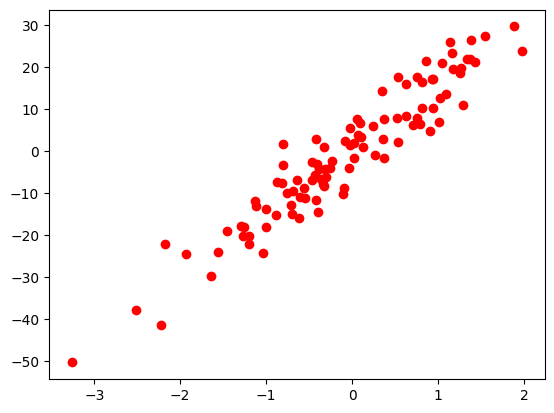

In [19]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Your observation about data: Dữ liệu đầu vào ít, đơn giản và khá đồng nhất, đường hồi quy ít bị ảnh hưởng bởi các thành phần nhiễu. Các điểm dữ liệu nằm phân tán nhưng có xu hướng chung là tập trung thành 1 đường thẳng.

#### Training function

In [20]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    pinv = np.linalg.pinv(X.T@X)
    w = pinv@X.T@y
    
    return w

In [21]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
m = len(X)
cols = len(X[0]) + 1
one_added_X = np.zeros((m,cols))
one_added_X[:,1:cols] = X[:,0:cols-1]

print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-3.5274988167122165, 2.2455458095172345)

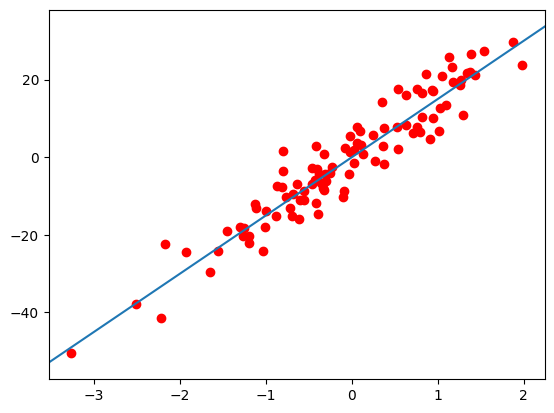

In [22]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
ones_added_xs = np.c_[np.ones(len(xs)), xs]
predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

Ưu điểm và nhược điểm của Hồi quy tuyến tính.
- Ưu điểm:
    + Hồi quy tuyến tính là một phương pháp đơn giản, dễ hiểu, ít phức tạp và dễ thực hiện. Nó không đòi hỏi nhiều giả định phức tạp và cung cấp một cách tiếp cận trực quan để phân tích mối quan hệ giữa biến.
    + So với các phương pháp phức tạp hơn, hồi quy tuyến tính có tính toán nhanh chóng và hiệu quả. Điều này làm cho nó phù hợp cho việc xử lý các tập dữ liệu lớn.
    + Giả định đơn giản: Hồi quy tuyến tính dựa trên một số giả định cơ bản, như độc lập tuyến tính, sai số chuẩn và không có hiện tượng đa cộng tuyến. Mặc dù giả định này có thể không đúng trong thực tế, nhưng nó giúp giảm độ phức tạp và đưa ra kết quả có ý nghĩa.
    + Hồi quy tuyến tính cung cấp một phương pháp tối ưu để diễn giải mối quan hệ giữa biến. Các hệ số hồi quy cho phép đánh giá độ lớn và hướng của tác động của mỗi biến độc lập đến biến phụ thuộc.
    + Hồi quy tuyến tính giúp thực hiện tốt các dữ liệu có thể phân tách ra ở dạng tuyến tính so với các phương pháp khác. 
- Nhược điểm:
    + Hồi quy tuyến tính dựa trên giả định về mối quan hệ tuyến tính giữa biến độc lập và biến phụ thuộc. Trong thực tế, mối quan hệ này có thể không tuyến tính, dẫn đến hiệu suất dự đoán không chính xác.
    + Hồi quy tuyến tính có thể bị ảnh hưởng bởi nhiễu và dữ liệu ngoại lệ. Một điểm dữ liệu không phù hợp có thể ảnh hưởng lớn đến kết quả và đường hồi quy. Điều này có thể xảy ra khi dữ liệu bị mất hoặc có giá trị bất thường.
    + Hồi quy tuyến tính không thể mô hình hóa mối quan hệ phi tuyến và không thể xử lý các biến phức tạp hơn như các biến định tính. Điều này có thể dẫn đến việc mô hình không thể giải thích được tất cả các yếu tố quan trọng liên quan đến biến phụ thuộc.
    + Khi có nhiều biến độc lập trong mô hình, hồi quy tuyến tính có thể không dễ dàng xác định được biến quan trọng nhất ảnh hưởng đến biến phụ thuộc. Điều này có thể dẫn đến việc bỏ qua hoặc đánh giá sai vai trò của các biến.
    + Hồi quy tuyến tính gặp khó khăn khi thực hiện trên tập dữ liệu có nhiều thuộc tính.
    